# 1. Import libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from collections import Counter
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Tải dataset
df = pd.read_csv("/kaggle/input/amazon-sales-dataset/amazon.csv")

# 2. Dataset Overview

In [3]:
df.head(5)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [4]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset has 1465 rows and 16 columns.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [6]:
for _ in range(5):
    print(f"Review title {_}: {df.loc[_, 'review_title']}")

Review title 0: Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good
Review title 1: A Good Braided Cable for Your Type C Device,Good quality product from ambrane,Super cable,As,Good quality,Good product,its good,Good quality for the price but one issue with my unit
Review title 2: Good speed for earlier versions,Good Product,Working good,Good for the price,Good,Worth for money,Working nice,it's a really nice product
Review title 3: Good product,Good one,Nice,Really nice product,Very first time change,Good,Fine product but could be better,Very nice it's charging like jet
Review title 4: As good as original,Decent,Good one for secondary use,Best quality,GOOD,Amazing product at a mind blowing price!,Nice Quality,Good product


In [7]:
for _ in range(5):
    print(f"Review content {_}: {df.loc[_, 'review_content']}")

Review content 0: Looks durable Charging is fine tooNo complains,Charging is really fast, good product.,Till now satisfied with the quality.,This is a good product . The charging speed is slower than the original iPhone cable,Good quality, would recommend,https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/81---F1ZgHL._SY88.jpg,Product had worked well till date and was having no issue.Cable is also sturdy enough...Have asked for replacement and company is doing the same...,Value for money
Review content 1: I ordered this cable to connect my phone to Android Auto of car. The cable is really strong and the connection ports are really well made. I already has a Micro USB cable from Ambrane and it's still in good shape. I connected my phone to the car using the cable and it got connected well and no issues. I also connected it to the charging port and yes it has Fast Charging support.,It quality is good at this price and the main thing is that i didn't ever thought that this cable 

# 3. Data Preprocessing

In [8]:
# Loại bỏ kí tự lạ và chuyển đổi kiểu dữ liệu của các cột 'discounted price' và 'actual price'
df['discounted_price'] = df['discounted_price'].str.replace("₹",'')
df['discounted_price'] = df['discounted_price'].str.replace(",",'')
df['discounted_price'] = df['discounted_price'].astype('float64')

df['actual_price'] = df['actual_price'].str.replace("₹",'')
df['actual_price'] = df['actual_price'].str.replace(",",'')
df['actual_price'] = df['actual_price'].astype('float64')
print(df['discounted_price'].dtype)
print(df['actual_price'].dtype)

float64
float64


In [9]:
# Thay đổi kiểu dữ liệu và scale lại giá trị trong cột 'discount_percentage'
df['discount_percentage'] = df['discount_percentage'].str.replace('%','').astype('float64')
df['discount_percentage'] = df['discount_percentage'] / 100
print(df['discount_percentage'].dtype)

float64


In [10]:
# Thay đổi kiểu dữ liệu của cột 'rating_count'
df['rating_count'] = df['rating_count'].str.replace(',', '').astype('float64')
print(df['rating_count'].dtype)

float64


<p>Trong phần output của <strong>df.info()</strong> ở trên, ta thấy có 1463/1465 giá trị không phải null của cột 'rating_count'. May thay, để xử lý 2 giá trị null này, ta sẽ tìm kiếm link của 2 sản phẩm đó trong cột 'product_link' để tìm ra số lượng đánh giá và điền vào cột 'rating_count'.</p>

In [11]:
rating_count_null = df[df['rating_count'].isnull()]
rating_count_null

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,199.0,999.0,0.80,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,249.0,999.0,0.75,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


In [12]:
# Lấy link của 2 sản phẩm này
print(df.loc[282, 'product_link'])
print(df.loc[324, 'product_link'])

https://www.amazon.in/Amazon-Brand-Charging-Suitable-Supported/dp/B0B94JPY2N/ref=sr_1_444?qid=1672909146&s=electronics&sr=1-444
https://www.amazon.in/REDTECH-Lightning-Certified-Charging-Compatible/dp/B0BQRJ3C47/ref=sr_1_491?qid=1672909149&s=electronics&sr=1-491


<p>Sau khi tìm kiếm các link trên, tôi nhận được rating_count cho sản phẩm thứ nhất là 61, nhưng tôi không thể truy cập vào đường link của sản phẩm thứ 2 do "Page Not Found". Do đó, tôi sẽ sử dụng kĩ thuật Median Imputation để điền giá trị rating_count cho sản phẩm này.</p>

In [13]:
df.loc[282, 'rating_count'] = 61
df['rating_count'] = df['rating_count'].fillna(df['rating_count'].median()).round()
print(df.loc[282, 'rating_count'])
print(df.loc[324, 'rating_count'])

61.0
5178.0


Ta kiểm tra xem còn giá trị null nào trong dataset nữa không

In [14]:
if df.isnull().sum().sum() == 0:
    print("There aren't any missing values left.")
else: 
    print("Check again.")

There aren't any missing values left.


In [15]:
# Find Duplicate
if not df.duplicated().any():
    print("There aren't any duplicates.")
else:
    print("Check to find out duplicates.")

There aren't any duplicates.


# 4. Data Visualization

## 4.1 'Category' distribution

In [16]:
# Tách các phân loại từ cột 'category'
all_categories = df['category'].apply(lambda x: x.split('|'))
flat_categories = [cat.strip() for sublist in all_categories for cat in sublist]

# Đếm tần suất xuất hiện của từng phân loại
category_counts = Counter(flat_categories)
sorted_counts = category_counts.most_common()

# Chuyển thành DataFrame để dễ vẽ
cat_df = pd.DataFrame(sorted_counts, columns=['Category', 'Count'])
cat_df

,Category,Count
0,Electronics,526
1,Computers&Accessories,453
2,Home&Kitchen,448
3,Accessories&Peripherals,381
4,Kitchen&HomeAppliances,308
...,...,...
312,StandMixers,1
313,PedestalFans,1
314,VacuumAccessories,1
315,VacuumBags,1


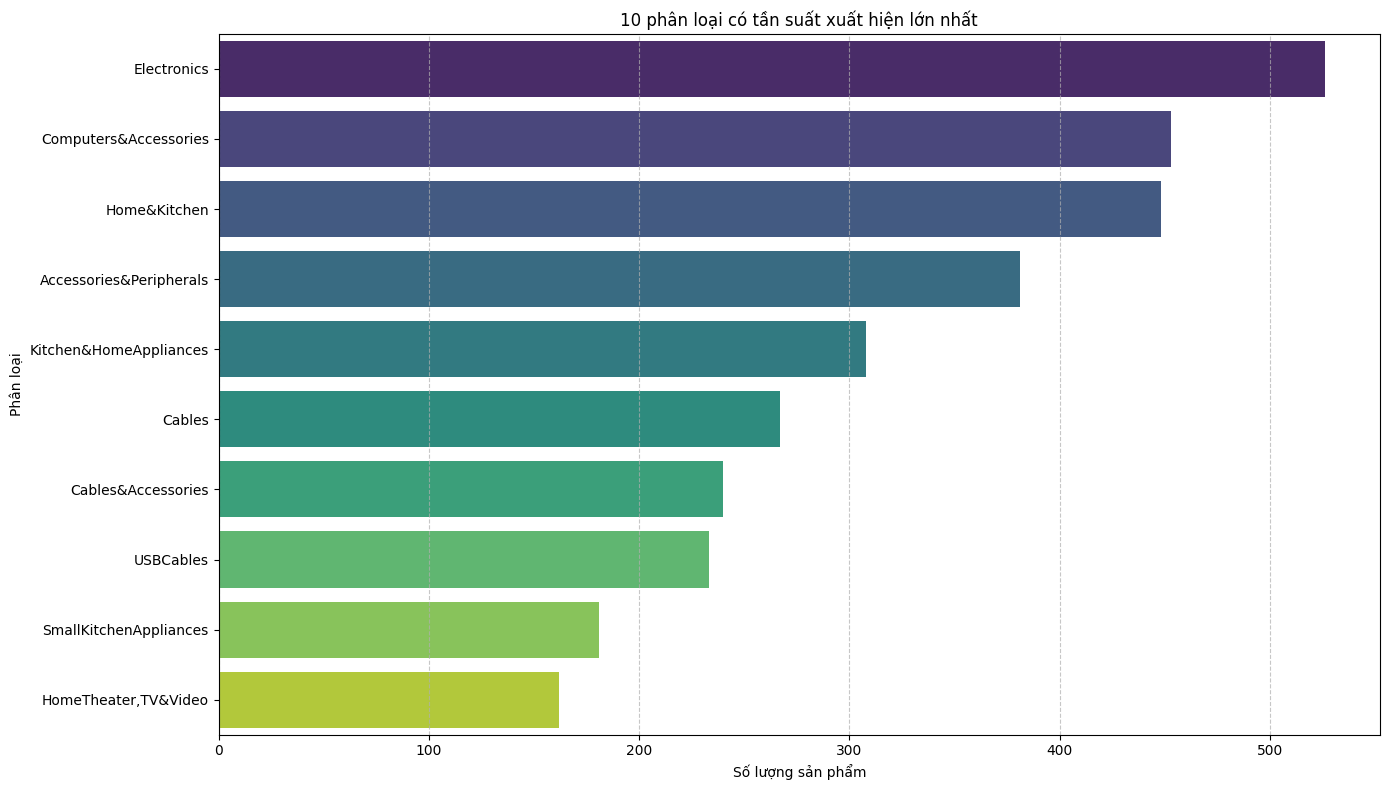

In [17]:
# Vẽ biểu đồ histogram (bar chart)
plt.figure(figsize=(14, 8))
sns.barplot(data=cat_df.head(10), x='Count', y='Category', palette='viridis')
plt.title('10 phân loại có tần suất xuất hiện lớn nhất')
plt.xlabel('Số lượng sản phẩm')
plt.ylabel('Phân loại')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

## 4.2 'Rating' distribution

In [18]:
rating_counts = df['rating'].value_counts().sort_index()
rating_counts

rating
2        1
2.3      1
2.6      1
2.8      2
2.9      1
3        1
3.0      3
3.1      4
3.2      2
3.3     16
3.4     10
3.5     26
3.6     35
3.7     42
3.8     86
3.9    123
4       52
4.0    129
4.1    244
4.2    228
4.3    230
4.4    123
4.5     75
4.6     17
4.7      6
4.8      3
5.0      3
|        1
Name: count, dtype: int64

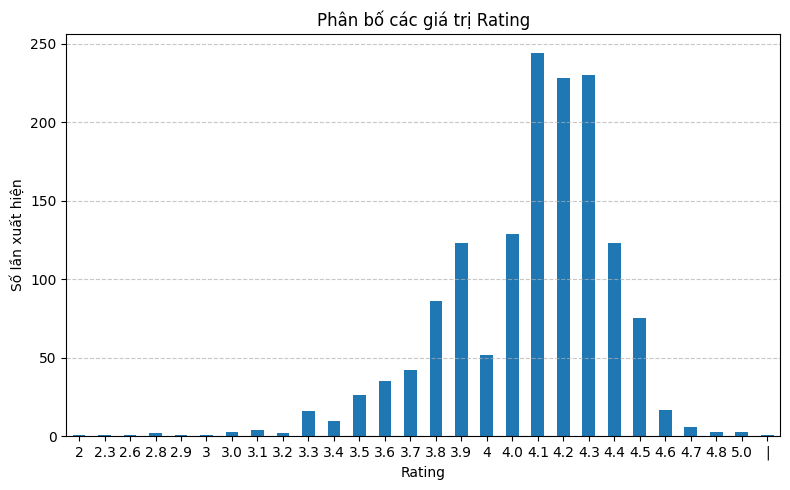

In [19]:
plt.figure(figsize=(8, 5))
rating_counts.plot(kind='bar')

plt.xlabel('Rating')
plt.ylabel('Số lần xuất hiện')
plt.title('Phân bố các giá trị Rating')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 4.3 Price Distribution

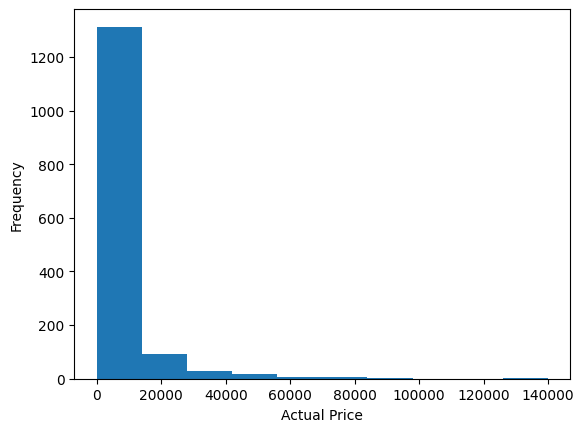

In [20]:
# Plot distribution of actual_price
plt.hist(df['actual_price'])
plt.xlabel('Actual Price')
plt.ylabel('Frequency')
plt.show()

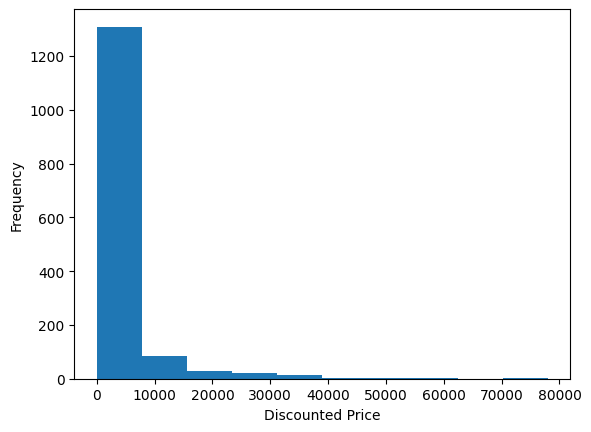

In [21]:
# Plot distribution of discount_price
plt.hist(df['discounted_price'])
plt.xlabel('Discounted Price')
plt.ylabel('Frequency')
plt.show()

# 5. Research Questions

## 5.1 Mức giảm giá ảnh hưởng như thế nào đến hành vi và cảm nhận của người tiêu dùng đối với sản phẩm?

### 🔍 Tại sao lại chọn câu hỏi này?

#### **Tính khái quát hóa cao:**
Câu hỏi bao phủ được ba khía cạnh:

- **Cảm nhận chất lượng** (thể hiện qua đánh giá sao).
- **Tương tác người dùng** (số lượng đánh giá).
- **Tâm lý giá trị cảm nhận** (*Price-Quality Heuristic*, *Expectation Theory*).

#### **Phù hợp với hướng phân tích định lượng:**
Cho phép sử dụng:

- Phân tích tương quan (Pearson, Spearman)
- Phân tích hồi quy
- Phân nhóm (*clustering* theo mức giảm giá và đánh giá)

#### **Rất thực tiễn trong thương mại điện tử:**
Các nền tảng như **Shopee**, **Tiki**, **Amazon**... thường muốn biết:

- Khi nào nên giảm giá?
- Giảm bao nhiêu là “vừa đủ” để thu hút nhưng không làm giảm niềm tin vào chất lượng sản phẩm?

---

### 🧪 Tính ứng dụng trong thực tế và nghiên cứu học thuật

#### ✅ **Trong thực tế:**
- Giúp các nhãn hàng tối ưu hóa chiến dịch khuyến mãi.
- Hỗ trợ các đội UX/marketing hiểu rõ hành vi người tiêu dùng.

#### ✅ **Trong học thuật:**
Gắn liền với các khái niệm như:

- *Behavioral Pricing*
- *Perceived Value*
- *Price Sensitivity*

### 📊 Mục đích sử dụng Pearson và Spearman

Để trả lời cho câu hỏi nghiên cứu **“Giảm giá càng nhiều thì sản phẩm có được đánh giá cao hơn không?”**, ta cần xác định **mối tương quan** giữa mức giảm giá (`discount_percentage`) và điểm đánh giá (`rating`). Cụ thể:

- **Hệ số tương quan Pearson** được sử dụng để đo **mức độ tuyến tính** giữa hai biến số.  
  👉 Nếu Pearson < 0: càng giảm giá nhiều thì điểm đánh giá càng giảm (nghịch chiều).

- **Hệ số tương quan Spearman** dùng để đo **mối liên hệ đơn điệu** dựa trên **xếp hạng**, không yêu cầu mối quan hệ phải tuyến tính.  
  👉 Phù hợp trong trường hợp dữ liệu có thể không phân bố chuẩn hoặc có ngoại lệ.

Sử dụng đồng thời cả Pearson và Spearman giúp đảm bảo **kết luận có độ tin cậy cao**, dù quan hệ có tuyến tính hay không.


### 5.1.1 Giảm giá càng nhiều thì sản phẩm có được đánh giá cao hơn không?

<p>Trước khi trả lời câu hỏi này, tôi đã không thể chạy được đoạn code bên dưới do có giá trị nào đó trong cột 'discount_percentage' hoặc 'rating' không phải kiểu số thực. Do ta đã thay đổi kiểu dữ liệu thành công cho cột 'discount_percentage ở trên', có thể kết luận rằng có giá trị nào đó trong cột 'rating' có kiểu dữ liệu không phù hợp. Để giải quyết vấn đề này, trước hết ta sẽ tìm các hàng chứa giá trị 'rating' không phải kiểu thực.</p>

In [22]:
df['rating_float'] = pd.to_numeric(df['rating'], errors='coerce')
rating_not_float = df[df['rating_float'].isna()]
print(rating_not_float[['rating']])

     rating
1279      |


<p>Sau khi đã xác định được hàng chứa giá trị 'rating' bị lỗi, ta sẽ điền lại giá trị này bằng cách tìm link của nó trong cột 'product_link' giống như đã làm với các giá trị trong 'rating_count' trước đó.</p>

In [23]:
print(df.loc[1279, 'product_link'])

https://www.amazon.in/Eureka-Forbes-Vacuum-Cleaner-Washable/dp/B08L12N5H1/ref=sr_1_295?qid=1672923607&s=kitchen&sr=1-295


<p>Ta tìm được rating của sản phẩm này là 3.9, do đó ta sẽ điền lại 3.9 vào thay cho '|' trong bảng.</p>

In [24]:
df['rating'] = df['rating'].astype(str)
df.loc[1279, 'rating'] = float(str(df.loc[1279, 'rating']).replace('|', '3.9'))
df['rating'] = df['rating'].astype(float)
print(df['rating'].dtype)

float64


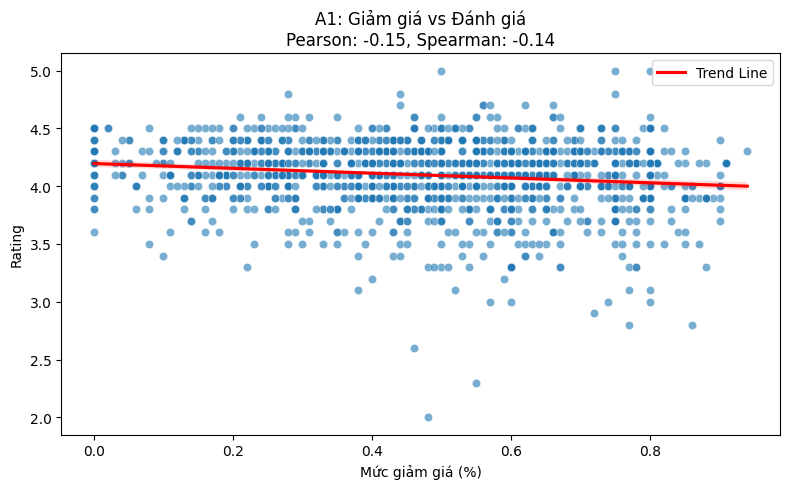

In [25]:
from scipy.stats import pearsonr, spearmanr

# Tính hệ số tương quan
pearson_corr, _ = pearsonr(df['discount_percentage'], df['rating'])
spearman_corr, _ = spearmanr(df['discount_percentage'], df['rating'])

# Vẽ biểu đồ phân tán
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='discount_percentage', y='rating', alpha=0.6)
sns.regplot(data=df, x='discount_percentage', y='rating', scatter=False, color='red', label='Trend Line')
plt.title(f'A1: Giảm giá vs Đánh giá\nPearson: {pearson_corr:.2f}, Spearman: {spearman_corr:.2f}')
plt.xlabel('Mức giảm giá (%)')
plt.ylabel('Rating')
plt.legend()
plt.tight_layout()
plt.show()

## 🎯 Kết luận rút ra

### 1. Có mối liên hệ nghịch chiều yếu
- Cả **Pearson** và **Spearman** đều < 0 → mối quan hệ **nghịch chiều**:
  > Giảm giá càng cao → Điểm đánh giá có xu hướng giảm.
- Tuy nhiên, độ lớn |–0.15| và |–0.14| là nhỏ → **mối liên hệ yếu**, chưa đủ mạnh để khẳng định chắc chắn.

### 2. Ý nghĩa trong thực tế
Việc giảm giá **không giúp cải thiện điểm đánh giá**, thậm chí còn có xu hướng **giảm nhẹ**:

- Người dùng có thể **nghi ngờ chất lượng** khi sản phẩm bị giảm giá mạnh.
- Giảm giá thu hút **nhiều người mua mới** → kỳ vọng cao nhưng trải nghiệm chưa tốt → đánh giá thấp.
- Người mua hàng giá rẻ đôi khi **đánh giá khắt khe hơn**.

---

### 📌 Kết luận ngắn gọn
Có tồn tại một **mối quan hệ nghịch chiều yếu** giữa mức giảm giá và điểm đánh giá.  
👉 Điều này **gợi ý** rằng giảm giá nhiều có thể ảnh hưởng **tiêu cực nhẹ** đến đánh giá sản phẩm,  
nhưng **chưa đủ mạnh** để đưa ra kết luận chắc chắn.  
**Cần kết hợp thêm các yếu tố khác** như: chất lượng thực tế, thương hiệu, mô tả sản phẩm,...


### 5.1.2 Mức giảm giá có ảnh hưởng đến số lượng đánh giá không?

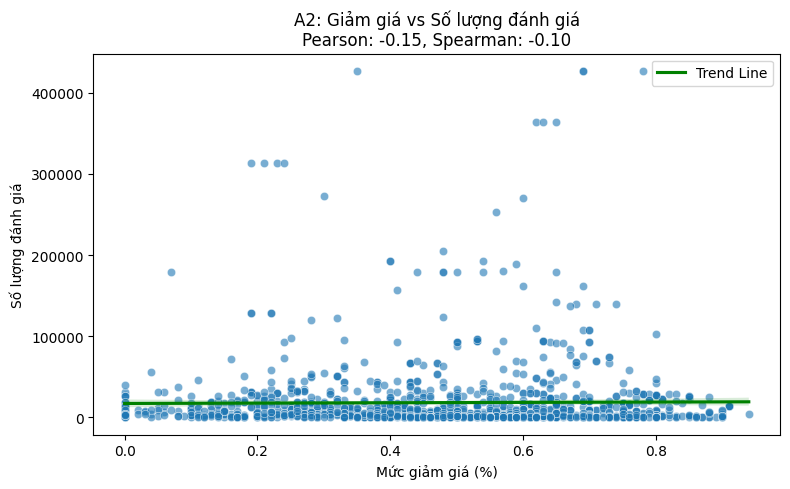

In [26]:
# Tính hệ số tương quan
# pearson_corr, _ = pearsonr(df['discount_percentage'], df['rating_count'])
spearman_corr, _ = spearmanr(df['discount_percentage'], df['rating_count'])

# Vẽ biểu đồ phân tán
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='discount_percentage', y='rating_count', alpha=0.6)
sns.regplot(data=df, x='discount_percentage', y='rating_count', scatter=False, color='green', label='Trend Line')
plt.title(f'A2: Giảm giá vs Số lượng đánh giá\nPearson: {pearson_corr:.2f}, Spearman: {spearman_corr:.2f}')
plt.xlabel('Mức giảm giá (%)')
plt.ylabel('Số lượng đánh giá')
plt.legend()
plt.tight_layout()
plt.show()

## 🎯 Kết luận rút ra

### 1. Có mối liên hệ nghịch chiều yếu
- **Pearson = -0.15**, **Spearman = -0.10** → cả hai đều < 0 → cho thấy **mối quan hệ nghịch chiều nhẹ**:
  > Mức giảm giá cao hơn → Số lượng đánh giá có xu hướng giảm.

- Tuy nhiên, độ lớn của các hệ số là nhỏ → **mối quan hệ yếu**, không mạnh.

### 2. Ý nghĩa trong thực tế
Kết quả này đi ngược lại với kỳ vọng ban đầu (giảm giá → nhiều đánh giá hơn), có thể do:

- Sản phẩm giảm giá sâu thường là **sản phẩm tồn kho hoặc ít nổi bật** → ít người quan tâm.
- Người dùng mua sản phẩm giá rẻ hơn có thể **ít động lực để để lại đánh giá**.
- Số lượng đánh giá không chỉ phụ thuộc vào giá, mà còn vào **truyền thông, chất lượng sản phẩm hoặc thương hiệu**.

---

### 📌 Kết luận ngắn gọn
Tồn tại một **mối quan hệ nghịch chiều yếu** giữa mức giảm giá và số lượng đánh giá.

👉 Giảm giá **không làm tăng số lượng đánh giá**, thậm chí còn có thể **làm giảm nhẹ** lượng đánh giá thu về.

➡ Điều này cho thấy các yếu tố **phi giá cả** (thương hiệu, UX, chính sách hậu mãi...) có thể **quan trọng hơn** trong việc thúc đẩy người dùng để lại đánh giá.


## ✅ Kết luận chung cho câu hỏi: Mức giảm giá ảnh hưởng như thế nào đến hành vi và cảm nhận của người tiêu dùng đối với sản phẩm?

### 🧠 Giải thích tiềm năng
- **Giảm giá sâu** có thể gây nghi ngờ về chất lượng, làm giảm **giá trị cảm nhận (perceived value)** → ảnh hưởng đến điểm đánh giá và khả năng người dùng để lại phản hồi.
- Người dùng được hưởng ưu đãi cao **không nhất thiết sẽ đánh giá tích cực hơn** hoặc có động lực đánh giá cao hơn.
- Việc đánh giá của người dùng có thể chịu ảnh hưởng từ nhiều yếu tố hơn là giá, như: **chất lượng sản phẩm, mô tả, thương hiệu, kỳ vọng cá nhân**...

### 📌 Kết luận ngắn gọn
> **Giảm giá không đồng nghĩa với việc sẽ cải thiện đánh giá hay tăng lượng phản hồi của người dùng.**  
> Thay vào đó, mức giảm giá cao có thể **ảnh hưởng tiêu cực nhẹ** đến cả điểm số và số lượng đánh giá.

➡ Do đó, doanh nghiệp cần **cân nhắc kỹ chiến lược giảm giá**, kết hợp với các yếu tố khác như truyền thông, bảo đảm chất lượng và chăm sóc hậu mãi để đạt hiệu quả tốt nhất.


## 5.2 Các danh mục sản phẩm khác nhau có đặc điểm gì nổi bật về giá cả, mức giảm giá và mức độ thu hút đánh giá từ người dùng?

# 🔍 Tại sao lại chọn câu hỏi này?

## 🎯 Mục tiêu phân tích

Sau khi quan sát **ảnh hưởng giảm giá trên toàn bộ sản phẩm**, việc **chuyển sang phân tích theo lớp danh mục** giúp trả lời câu hỏi:  
➡️ *Nguồn lực nên dồn vào đâu để tối ưu hiệu quả?*

---

## 🧩 Chiến lược TMĐT theo danh mục

- **Category nhiều review**  
  → Tận dụng được **UGC** (User-Generated Content) và **độ tin cậy cao** từ cộng đồng.

- **Category giá cao**  
  → **Đóng góp doanh thu lớn**, thường **ít cần chiết khấu**, tối ưu lợi nhuận trực tiếp.

- **Category giá thấp**  
  → Đóng vai trò **"mồi" traffic**, thu hút người dùng → **cần quản trị kỹ biên lợi nhuận**.

---

## 📚 Góc nhìn học thuật

Phân tích này liên quan đến các khái niệm như:

- **Price Fairness**: Cảm nhận của khách hàng về sự công bằng trong định giá.
- **Review Herding**: Hiện tượng người tiêu dùng bị ảnh hưởng bởi các đánh giá trước đó khi đưa ra quyết định mua hàng.


In [27]:
df['main_category'] = df['category'].apply(lambda x: x.split('|')[0].strip())

# Để hiển thị % dễ đọc hơn:
def pct(x): return f'{x*100:.1f}%'

# 🧪 Tính ứng dụng trong thực tế và nghiên cứu học thuật

## ✅ Trong thực tế:

- **Ưu tiên hiển thị:**  
  Xếp **danh mục giàu UGC** (nhiều review, ảnh thật) ở **vị trí trang chủ** hoặc **danh sách gợi ý** để tăng độ tin cậy và chuyển đổi.

- **Gợi ý đánh giá:**  
  Với **danh mục ít UGC**, sử dụng **email/SMS sau mua** kèm **voucher nhỏ** để **khuyến khích khách hàng để lại review**.

- **Tối ưu chiết khấu:**  
  - **Danh mục có biên lợi nhuận cao** → **chỉ nên giảm nhẹ**.  
  - **Danh mục có biên lợi nhuận thấp hoặc tồn kho cao** → **giảm sâu để đẩy hàng**.

---

## ✅ Trong học thuật:

Phân tích này có liên hệ mật thiết với các khái niệm:

- **Review Herding**: Hiện tượng người tiêu dùng bị ảnh hưởng bởi đánh giá của người đi trước.
- **Price Fairness**: Cảm nhận của khách hàng về sự công bằng trong việc định giá sản phẩm.


### 5.2.1 Danh mục nào có số lượng sản phẩm được đánh giá nhiều nhất?

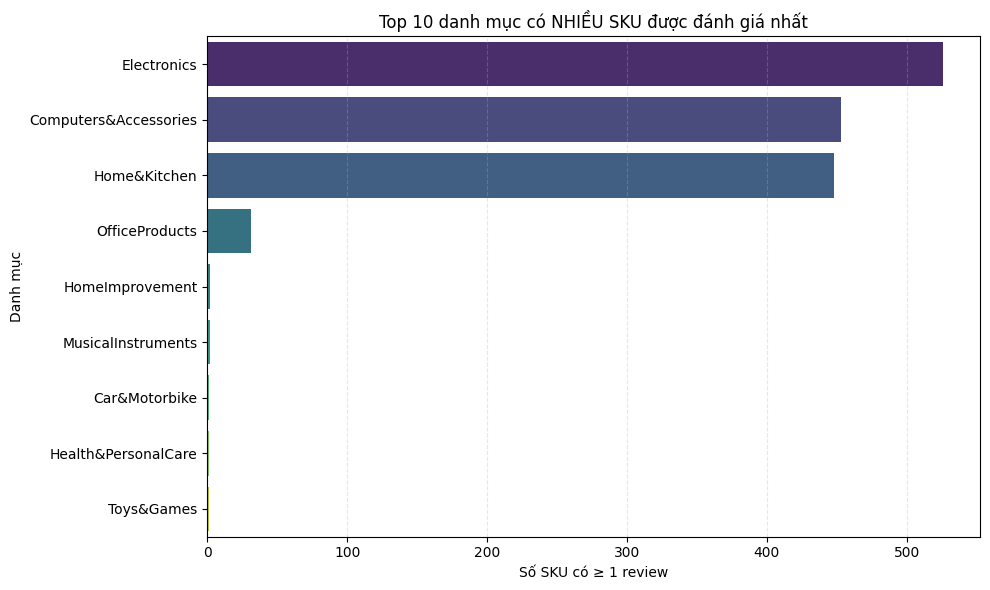

⭐ Danh mục dẫn đầu: **Electronics** (526 SKU-review)


In [28]:
reviewed = df[df['rating_count'] > 0].copy()

cat_reviewed_cnt = (
    reviewed.groupby('main_category')['product_link']  # hoặc 'product_name'
            .nunique()
            .sort_values(ascending=False)
)

plt.figure(figsize=(10,6))
sns.barplot(
    x=cat_reviewed_cnt.head(10).values,
    y=cat_reviewed_cnt.head(10).index,
    palette='viridis'
)
plt.title('Top 10 danh mục có NHIỀU SKU được đánh giá nhất')
plt.xlabel('Số SKU có ≥ 1 review')
plt.ylabel('Danh mục')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"⭐ Danh mục dẫn đầu: **{cat_reviewed_cnt.idxmax()}** "
      f"({cat_reviewed_cnt.max():,} SKU-review)")

# 📊 Kết luận rút ra

## 🔝 Danh mục được đánh giá nhiều nhất

- **Electronics** là danh mục có nhiều sản phẩm được đánh giá nhất, với **hơn 500 sản phẩm có ít nhất 1 review**.

- Các danh mục còn lại trong **top 3**:
  - **Computers & Accessories**
  - **Home & Kitchen**

📌 Điều này cho thấy các **ngành hàng công nghệ và đồ gia dụng** có **độ phổ biến cao**, nhận được **nhiều sự quan tâm và tương tác** từ người tiêu dùng.

---

## 📉 Khoảng cách rõ rệt giữa top 3 và phần còn lại

- **Top 3 danh mục** vượt trội hoàn toàn so với các nhóm như:
  - **Office Products**
  - **Musical Instruments**
  - **Toys & Games**

- Các danh mục phía sau có số lượng sản phẩm được đánh giá rất thấp → cho thấy:
  - **Độ phủ sản phẩm hạn chế**
  - **Mức độ quan tâm từ người dùng còn thấp**

---

## 💡 Ý nghĩa trong thực tế

- **Tập trung nguồn lực** vào các danh mục top đầu (Electronics, Computers, Home):
  - Tăng cường **marketing**
  - Đẩy mạnh **khuyến mãi**
  - **Phân tích hành vi khách hàng** nhờ lượng dữ liệu review dồi dào

- Với các danh mục ít được đánh giá:
  - Thúc đẩy review bằng **review incentive** (voucher, điểm thưởng...)
  - **Cải thiện mô tả sản phẩm**, hình ảnh, và **tối ưu kênh truyền thông**

---

## 📌 Kết luận ngắn gọn

- **Electronics** là danh mục có **nhiều sản phẩm được người dùng đánh giá nhất**, cho thấy đây là **khu vực hoạt động sôi nổi** trên sàn TMĐT.

> 👉 Doanh nghiệp và nhà nghiên cứu nên **ưu tiên phân tích & tối ưu các danh mục có độ phủ cao** để hiểu và khai thác hành vi người tiêu dùng hiệu quả hơn.


### 5.2.2 Danh mục nào có mức giá trung bình cao nhất / thấp nhất?

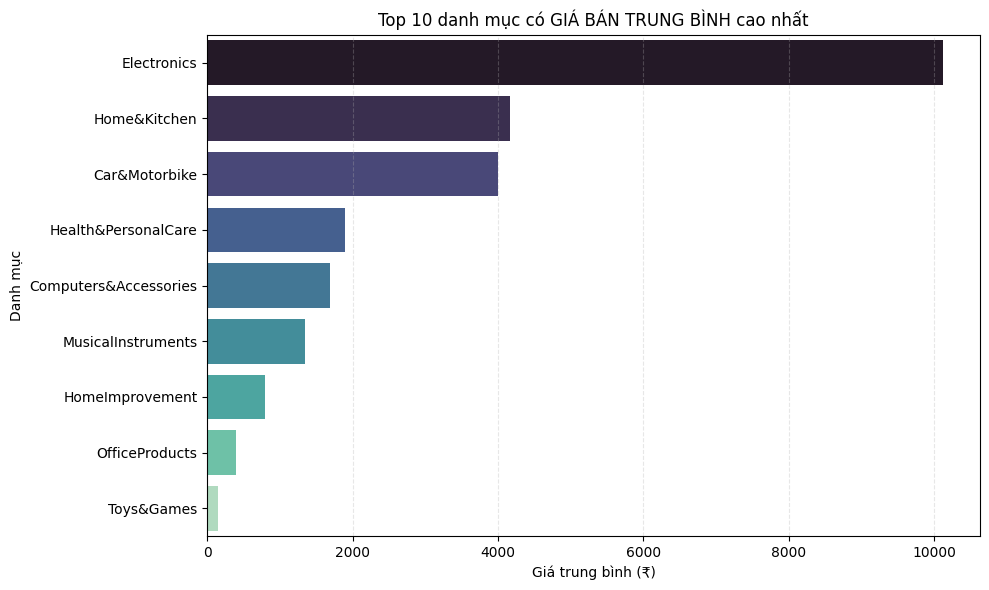

💰 Giá TB **cao nhất** → Electronics: ₹10,127
💸 Giá TB **thấp nhất** → Toys&Games: ₹150


In [29]:
# --------- 5.2.2 Code ----------
cat_price_mean = (
    df.groupby('main_category')['actual_price']
      .mean()
      .sort_values(ascending=False)
)

hi_cat, hi_val = cat_price_mean.idxmax(), cat_price_mean.max()
lo_cat, lo_val = cat_price_mean.idxmin(), cat_price_mean.min()

plt.figure(figsize=(10,6))
sns.barplot(
    x=cat_price_mean.head(10).values,
    y=cat_price_mean.head(10).index,
    palette='mako'
)
plt.title('Top 10 danh mục có GIÁ BÁN TRUNG BÌNH cao nhất')
plt.xlabel('Giá trung bình (₹)')
plt.ylabel('Danh mục')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"💰 Giá TB **cao nhất** → {hi_cat}: ₹{hi_val:,.0f}")
print(f"💸 Giá TB **thấp nhất** → {lo_cat}: ₹{lo_val:,.0f}")

# 📊 Kết luận rút ra

## 💰 Giá trung bình theo danh mục

- **Danh mục có giá trung bình cao nhất:**  
  - **Electronics** với mức trung bình lên đến **~₹10,000**

- **Các danh mục tiếp theo trong top:**
  - **Home & Kitchen**
  - **Car & Motorbike**  
  (đều có giá trung bình **trên ₹4,000**)

- **Danh mục có giá trung bình thấp nhất:**  
  - **Toys & Games** với mức giá trung bình chỉ **vài trăm ₹**

---

## 🔍 Chênh lệch giá rõ rệt

- Giá trung bình của **Electronics cao gấp hàng chục lần** so với **Toys & Games**
- Phản ánh đúng bản chất thị trường:
  - **Sản phẩm điện tử** thường có giá cao hơn
  - **Đồ chơi, văn phòng phẩm** có giá rẻ và phổ biến

---

## 💡 Ý nghĩa trong thực tế

- **Danh mục giá cao (Electronics):**
  - Cần chiến lược **giá và khuyến mãi thận trọng** để tránh giảm **giá trị cảm nhận** từ người tiêu dùng

- **Danh mục giá thấp (Toys & Games,...):**
  - Ưu tiên tăng **khối lượng bán** thay vì tập trung vào **giá trị đơn hàng**

- Thông tin này giúp doanh nghiệp:
  - **Định hình chiến lược định giá theo ngành hàng**
  - **Quyết định nên giảm giá ở đâu**, giữ giá ở đâu để **tối ưu hóa lợi nhuận** và **đáp ứng kỳ vọng người tiêu dùng**

---

## 📌 Kết luận ngắn gọn

- **Giá trung bình cao nhất:** *Electronics* (~₹10,000)  
- **Giá trung bình thấp nhất:** *Toys & Games*

> 👉 **Chênh lệch giá trung bình giữa các danh mục là rất lớn**, phản ánh sự đa dạng trong bản chất sản phẩm.

➡ **Doanh nghiệp cần điều chỉnh chiến lược giá theo từng ngành hàng**, đặc biệt khi kết hợp với các chiến lược **khuyến mãi** và **phân tích đánh giá khách hàng**.


### 5.2.3 Danh mục nào có mức giảm giá trung bình cao nhất?

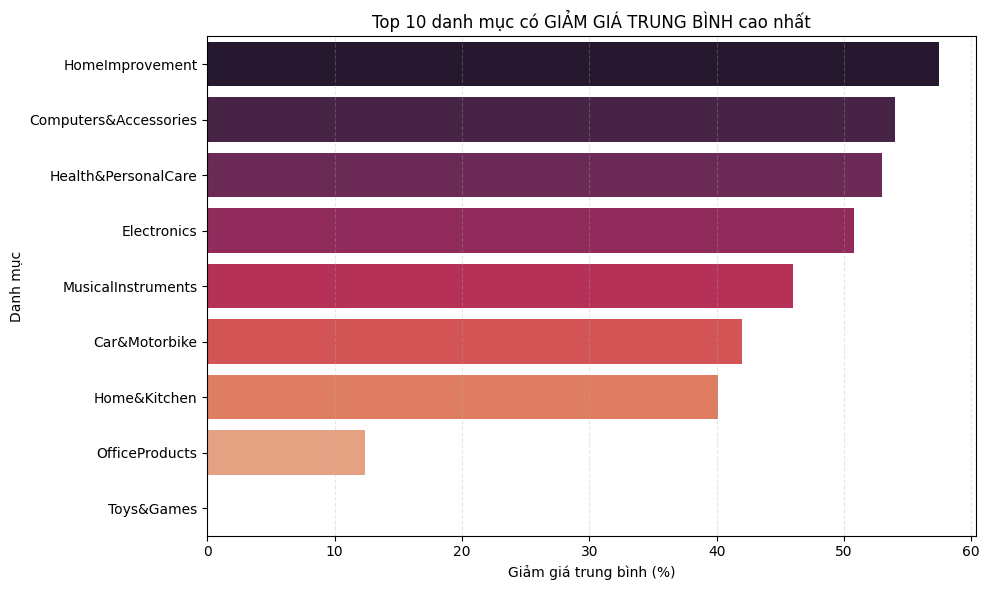

🛍️ Giảm giá TB cao nhất: **HomeImprovement** (57.5%)


In [30]:
# --------- 5.2.3 Code ----------
cat_disc_mean = (
    df.groupby('main_category')['discount_percentage']
      .mean()
      .sort_values(ascending=False)
)

top_disc_cat, top_disc_val = cat_disc_mean.idxmax(), cat_disc_mean.max()

plt.figure(figsize=(10,6))
sns.barplot(
    x=(cat_disc_mean.head(10)*100).values,
    y=cat_disc_mean.head(10).index,
    palette='rocket'
)
plt.title('Top 10 danh mục có GIẢM GIÁ TRUNG BÌNH cao nhất')
plt.xlabel('Giảm giá trung bình (%)')
plt.ylabel('Danh mục')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"🛍️ Giảm giá TB cao nhất: **{top_disc_cat}** ({pct(top_disc_val)})")

# 📉 Kết luận rút ra

## 🔻 Mức giảm giá trung bình theo danh mục

- **Danh mục có mức giảm giá trung bình cao nhất:**  
  - **Home Improvement** với mức giảm **gần 60%**
  - Đây là mức giảm rất lớn, vượt xa các danh mục còn lại

- **Các danh mục khác có mức giảm trung bình trên 50%:**
  - **Computers & Accessories**
  - **Health & Personal Care**
  - **Electronics**
  - → Phản ánh xu hướng **khuyến mãi mạnh ở các ngành hàng công nghệ và chăm sóc cá nhân**

- **Danh mục có mức giảm giá thấp nhất:**
  - **Toys & Games**
  - **Office Products**
  - → Chỉ khoảng **12%**, cho thấy ít sử dụng chiến lược khuyến mãi hoặc có **giá trị đơn hàng thấp**

---

## 💡 Ý nghĩa trong thực tế

- **Ngành hàng giảm giá cao** như:
  - *Home Improvement*, *Computers*
  - → Có thể đang áp dụng chiến lược **xả kho**, **khuyến mãi thường xuyên** để **kích cầu**

- **Ngành hàng giảm giá thấp** như:
  - *Toys & Games*, *Office Products*
  - → Có thể được định vị là **sản phẩm bình dân sẵn**, hoặc có **vòng đời ngắn**, ít cần giảm sâu

- Thông tin này giúp **nhà bán lẻ**:
  - Lập **kế hoạch khuyến mãi** hiệu quả theo từng danh mục
  - Ước lượng **biên độ lợi nhuận** dựa trên **thói quen giảm giá trong ngành**

---

## 📌 Kết luận ngắn gọn

- **Mức giảm giá trung bình cao nhất:** *Home Improvement* (~60%)  
- **Mức giảm thấp nhất:** *Toys & Games* và *Office Products* (~12%)

> 👉 **Việc giảm giá phụ thuộc rất nhiều vào loại sản phẩm, đặc điểm ngành hàng và chiến lược giá của từng nhóm**

➡ **Doanh nghiệp nên phân bổ ngân sách khuyến mãi một cách linh hoạt**, theo từng nhóm ngành để **tối ưu hiệu quả bán hàng và lợi nhuận**


# ✅ Kết luận chung cho câu hỏi:
## Danh mục nào nổi bật nhất theo các chỉ số đánh giá, giá bán và giảm giá?

---

## 🧠 Giải thích tiềm năng

- Các danh mục **đắt tiền** như **Electronics** thường cần giảm giá để **thu hút khách hàng**  
  → Khuyến mãi là **yếu tố sống còn** trong việc thúc đẩy doanh số.

- Các danh mục **giá thấp** như **Toys & Games** thường **bán theo số lượng**  
  → Không cần giảm sâu, chủ yếu dựa vào **lưu lượng truy cập và tần suất mua**.

- Việc **đánh giá sản phẩm** và **mức giá** có liên hệ mật thiết với **kỳ vọng và trải nghiệm cá nhân**  
  → Cần được phân tích **kết hợp** để hiểu **sâu hơn hành vi người dùng**.

---

## 📌 Kết luận ngắn gọn

- **Electronics** là danh mục **thống trị** trên nhiều khía cạnh:  
  - **Độ phổ biến**
  - **Giá trị sản phẩm**
  - **Hoạt động khuyến mãi**

- Ngược lại, các danh mục như **Toys & Games** có thể bị hạn chế về:  
  - **Độ phủ**
  - **Giá trị đơn hàng**

> 👉 **Kết quả này gợi ý rằng doanh nghiệp nên xây dựng chiến lược theo từng danh mục**, dựa trên:

- ✅ **Mức giá sản phẩm**  
- ✅ **Mức độ khuyến mãi cần thiết**  
- ✅ **Tập tính người tiêu dùng trong từng ngành hàng**

➡ Nhờ đó, doanh nghiệp có thể **tối ưu hiệu quả kinh doanh** và **đáp ứng tốt kỳ vọng khách hàng**.


## 5.3 Phản hồi bằng văn bản của người dùng phản ánh như thế nào về mức độ hài lòng và điểm đánh giá của họ đối với sản phẩm?

## 🔍 Tại sao lựa chọn câu hỏi này?

### Tính khái quát
Câu hỏi này bao trùm các khía cạnh cụ thể như từ khóa, độ dài nhận xét và mức đánh giá.

### Kết nối giữa dữ liệu định tính và định lượng
Nó cho phép phân tích giá trị ngôn ngữ (textual content) và giá trị số (rating) cùng lúc.

### Linh hoạt mở rộng
Có thể mở rộng sang phân tích cảm xúc, phân cụm người dùng, hoặc dự đoán hành vi đánh giá dựa vào văn bản.

---

## 🏢 Tính ứng dụng trong thực tế

### ✅ Trong doanh nghiệp (thương mại điện tử, marketing, chăm sóc khách hàng)

- **Hiểu sâu hơn về khách hàng**: Không chỉ biết “họ cho mấy sao”, mà còn hiểu vì sao họ hài lòng hay không.  
- **Phát hiện vấn đề sớm**: Nếu nhiều người viết dài và tiêu cực, doanh nghiệp có thể sớm can thiệp.  
- **Cá nhân hóa phản hồi**: Hệ thống chatbot có thể học để đưa ra phản hồi phù hợp hơn với từng kiểu đánh giá.

### ✅ Trong phát triển hệ thống đánh giá tự động

- Tích hợp vào mô hình gợi ý (recommendation systems).
- Xây dựng mô hình dự đoán điểm đánh giá từ nội dung review.
- Cải tiến hệ thống lọc spam, đánh giá giả mạo.

---

## 🎓 Tính ứng dụng trong nghiên cứu học thuật

- **Sentiment Analysis**: Là một hướng nghiên cứu lớn trong NLP và học máy (ML).  
- **Explainable AI (XAI)**: Giải thích được tại sao mô hình dự đoán điểm rating từ văn bản đưa ra kết quả như vậy.  
- **Consumer Behavior Studies**: Phân tích hành vi người tiêu dùng từ dữ liệu review là chủ đề phổ biến trong Marketing, Tâm lý học hành vi, và Thương mại điện tử.  
- **Human-Computer Interaction (HCI)**: Phân tích phản hồi người dùng giúp cải tiến UI/UX sản phẩm.


### 5.3.1 Những từ khóa nào xuất hiện nhiều nhất trong các nhận xét tích cực hoặc tiêu cực?


🔍 Nhóm: VERY_GOOD — Top 30 cụm từ TF-IDF:
  value money                    (9.103)
  good product                   (7.137)
  good quality                   (6.947)
  product good                   (6.113)
  build quality                  (6.094)
  easy use                       (5.646)
  looks good                     (5.450)
  quality good                   (5.092)
  easy install                   (4.558)
  really good                    (4.547)
  product price                  (4.161)
  quality product                (4.053)
  fast charging                  (4.040)
  wireless mouse                 (3.919)
  using months                   (3.192)
  update review                  (3.168)
  great product                  (3.139)
  nice product                   (2.907)
  good looking                   (2.840)
  using product                  (2.785)
  light weight                   (2.734)
  quality really                 (2.710)
  usb port                       (2.589)
  easy clean  

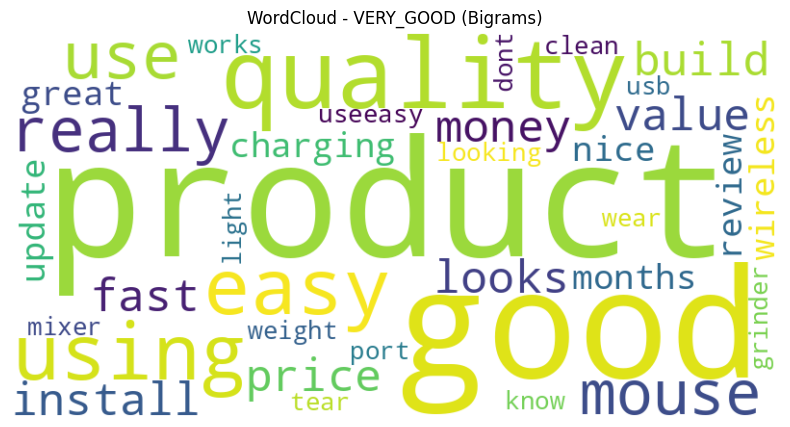


🔍 Nhóm: GOOD — Top 30 cụm từ TF-IDF:
  good product                   (86.405)
  quality good                   (66.971)
  easy use                       (66.892)
  good quality                   (64.395)
  value money                    (54.438)
  product good                   (54.327)
  fast charging                  (49.148)
  price range                    (43.809)
  sound quality                  (42.859)
  battery life                   (40.616)
  build quality                  (38.872)
  picture quality                (36.288)
  light weight                   (32.219)
  quality product                (31.922)
  overall good                   (31.282)
  working fine                   (30.871)
  product price                  (30.180)
  little bit                     (30.119)
  really good                    (29.885)
  nice product                   (29.166)
  charging speed                 (28.628)
  good price                     (27.869)
  works fine                     (27.0

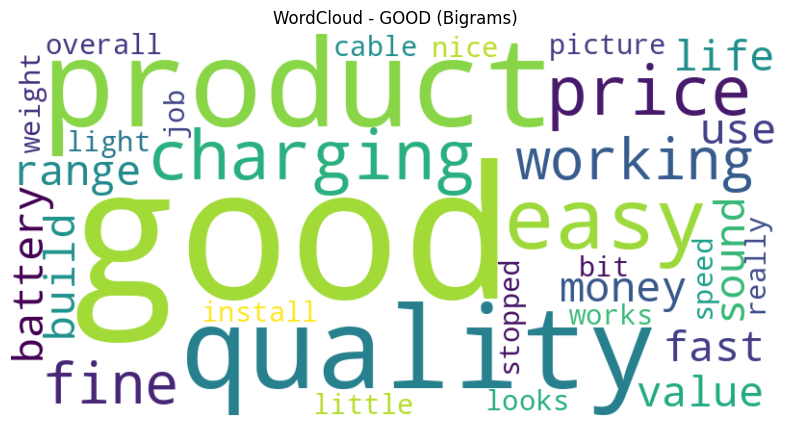


🔍 Nhóm: AVERAGE — Top 30 cụm từ TF-IDF:
  good product                   (26.753)
  product good                   (22.416)
  quality good                   (18.309)
  easy use                       (17.180)
  value money                    (16.995)
  sound quality                  (16.437)
  good quality                   (14.698)
  working fine                   (13.022)
  build quality                  (11.388)
  price range                    (11.182)
  light weight                   (10.964)
  nice product                   (10.919)
  product price                  (10.140)
  stopped working                (9.388)
  charging cable                 (9.285)
  product useful                 (8.969)
  overall good                   (7.879)
  battery backup                 (7.775)
  working properly               (7.742)
  really good                    (7.532)
  does job                       (7.397)
  fast charging                  (7.284)
  good price                     (7.241)
  q

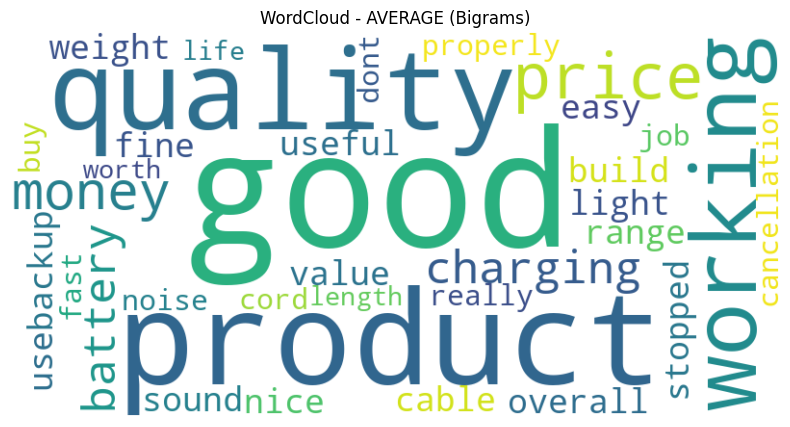


🔍 Nhóm: POOR — Top 30 cụm từ TF-IDF:
  quality good                   (4.599)
  easy use                       (2.582)
  sound quality                  (2.189)
  original remote                (2.165)
  worth money                    (2.000)
  fast charging                  (1.939)
  customer service               (1.849)
  voice recognition              (1.782)
  like product                   (1.776)
  good quality                   (1.665)
  light weight                   (1.652)
  price range                    (1.606)
  working fine                   (1.531)
  stopped working                (1.275)
  install driver                 (1.221)
  quality product                (1.212)
  ok ok                          (1.082)
  product price                  (1.045)
  cable socket                   (1.019)
  power takes                    (1.019)
  using regular                  (1.019)
  orginal product                (0.924)
  low quality                    (0.792)
  budget usb       

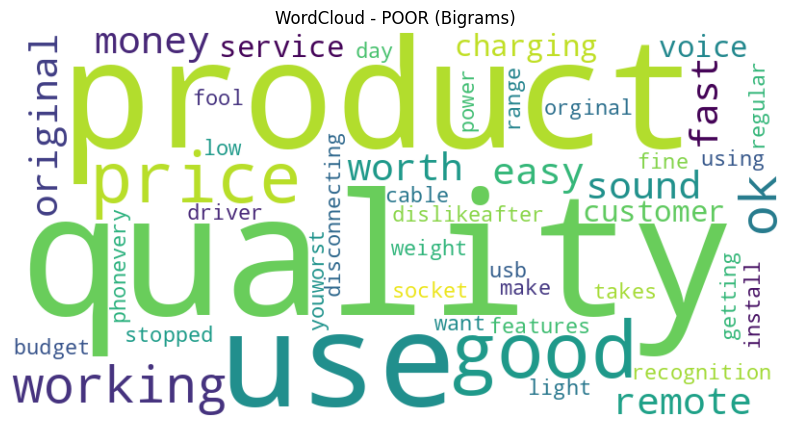

In [31]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

# === 2. Gán nhóm rating theo đề xuất ===
def categorize_rating(r):
    if r >= 4.5:
        return 'very_good'
    elif r >= 4.0:
        return 'good'
    elif r >= 3.5:
        return 'average'
    else:
        return 'poor'

df['rating_group'] = df['rating'].apply(categorize_rating)

# === 3. Làm sạch văn bản review ===
def clean_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['clean_review'] = df['review_content'].apply(clean_text)

# === 4. Hàm hiển thị cụm từ TF-IDF top N ===
def show_top_bigrams(group_name, top_n=30):
    texts = df[df['rating_group'] == group_name]['clean_review']
    if len(texts) == 0:
        print(f"\nKhông có dữ liệu cho nhóm: {group_name}")
        return

    # Phân tích cụm 2 từ (bigrams)
    vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(2, 2), max_features=top_n*2)
    X = vectorizer.fit_transform(texts)
    features = vectorizer.get_feature_names_out()
    scores = X.sum(axis=0).A1
    sorted_idx = np.argsort(scores)[::-1]
    top_features = [(features[i], scores[i]) for i in sorted_idx[:top_n]]

    print(f"\n🔍 Nhóm: {group_name.upper()} — Top {top_n} cụm từ TF-IDF:")
    for phrase, score in top_features:
        print(f"  {phrase:30s} ({score:.3f})")

    # WordCloud minh họa
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(features[i] for i in sorted_idx[:top_n]))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"WordCloud - {group_name.upper()} (Bigrams)")
    plt.axis("off")
    plt.show()

# === 5. Phân tích từng nhóm rating ===
for group in ['very_good', 'good', 'average', 'poor']:
    show_top_bigrams(group, top_n=30)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!



✅ Nhóm: VERY_GOOD — Top 20 cụm từ TÍCH CỰC:
  good easy                      (0.700)
  easy clean                     (0.681)
  works perfectly                (0.637)
  great product                  (0.625)
  quality awesome                (0.625)
  fine good                      (0.572)
  thanks amazon                  (0.557)
  really good                    (0.493)
  cable good                     (0.440)
  easy install                   (0.440)
  easy use                       (0.440)
  good build                     (0.440)
  good looking                   (0.440)
  good product                   (0.440)
  good quality                   (0.440)
  good working                   (0.440)
  looks good                     (0.440)
  overall good                   (0.440)
  product easy                   (0.440)
  product good                   (0.440)

❌ Nhóm: VERY_GOOD — Top 20 cụm từ TIÊU CỰC:
  strange design                 (-0.202)
  low price                      (-0.273)


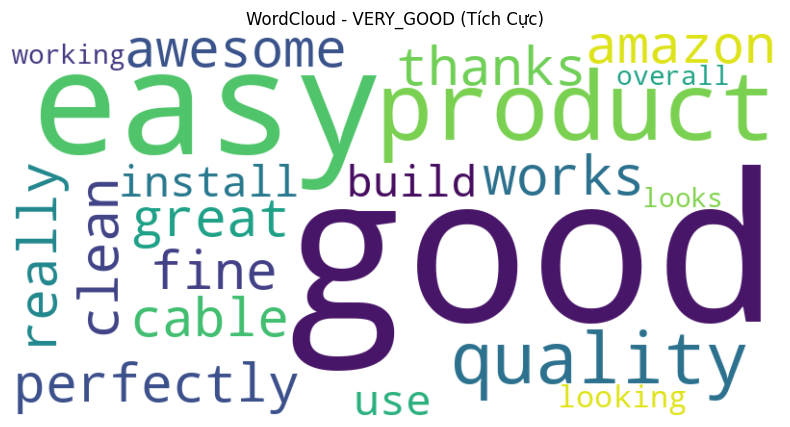

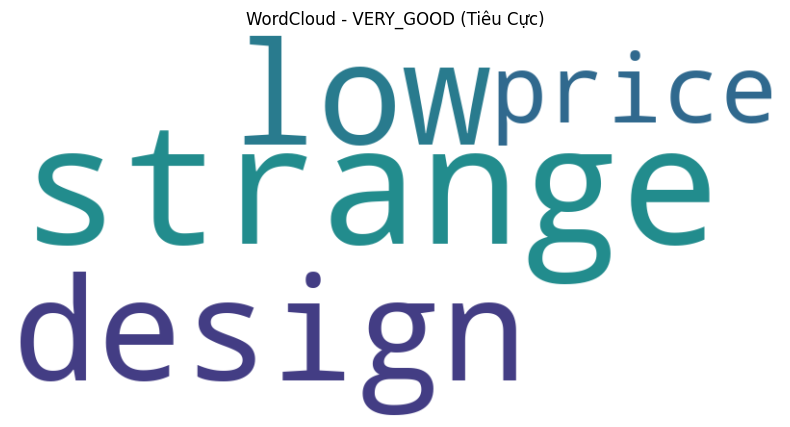


✅ Nhóm: GOOD — Top 20 cụm từ TÍCH CỰC:
  pretty good                    (0.727)
  good easy                      (0.700)
  good good                      (0.700)
  easy clean                     (0.681)
  customer care                  (0.494)
  quite good                     (0.493)
  really good                    (0.493)
  backup good                    (0.440)
  cable good                     (0.440)
  camera good                    (0.440)
  easy carry                     (0.440)
  easy install                   (0.440)
  easy use                       (0.440)
  good battery                   (0.440)
  good buy                       (0.440)
  good phone                     (0.440)
  good price                     (0.440)
  good product                   (0.440)
  good quality                   (0.440)
  good sound                     (0.440)

❌ Nhóm: GOOD — Top 20 cụm từ TIÊU CỰC:
  stopped working                (-0.226)


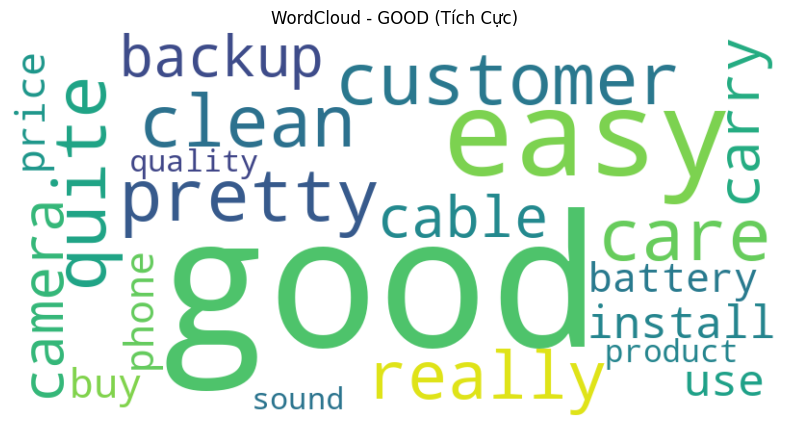

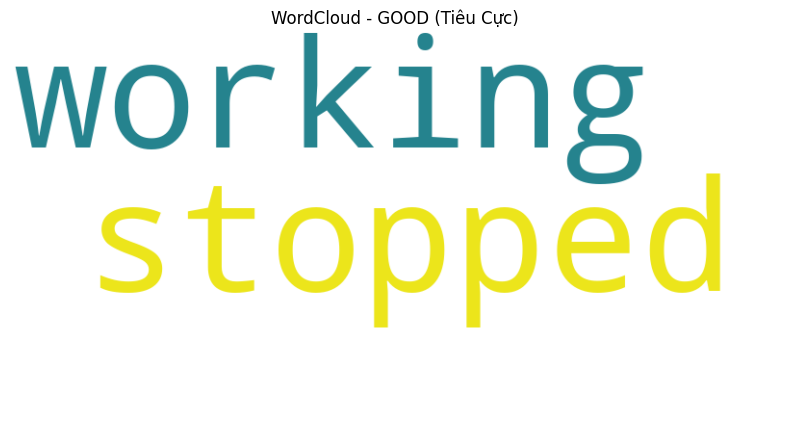


✅ Nhóm: AVERAGE — Top 20 cụm từ TÍCH CỰC:
  pretty good                    (0.727)
  easy clean                     (0.681)
  good value                     (0.649)
  great product                  (0.625)
  really happy                   (0.612)
  like original                  (0.586)
  customer care                  (0.494)
  really good                    (0.493)
  cable good                     (0.440)
  easy use                       (0.440)
  faces good                     (0.440)
  good battery                   (0.440)
  good looking                   (0.440)
  good price                     (0.440)
  good product                   (0.440)
  good quality                   (0.440)
  good sound                     (0.440)
  good ui                        (0.440)
  good use                       (0.440)
  good watch                     (0.440)

❌ Nhóm: AVERAGE — Top 20 cụm từ TIÊU CỰC:
  stopped working                (-0.226)


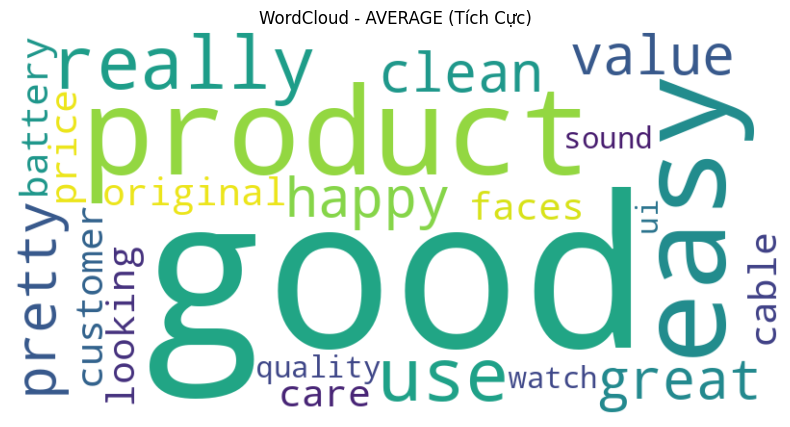

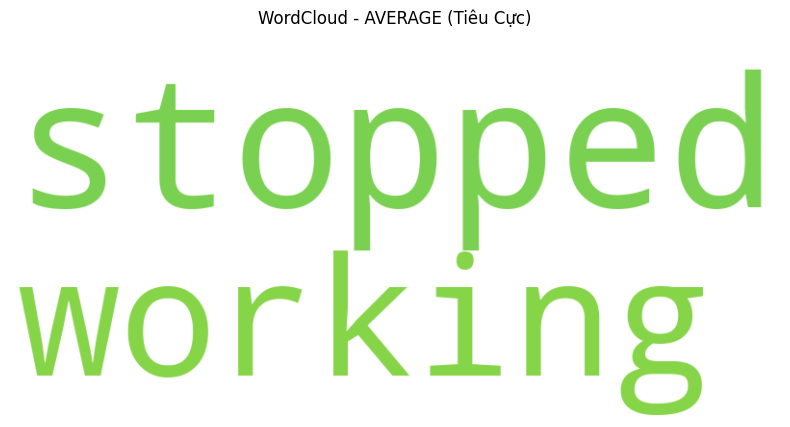


✅ Nhóm: POOR — Top 20 cụm từ TÍCH CỰC:
  ok ok                          (0.527)
  easy use                       (0.440)
  good dislikeafter              (0.440)
  good quality                   (0.440)
  lowvery good                   (0.440)
  phonevery good                 (0.440)
  quality good                   (0.440)
  smart features                 (0.402)
  watch smart                    (0.402)
  like product                   (0.361)
  plug play                      (0.340)
  original remote                (0.318)
  worth cost                     (0.226)
  worth money                    (0.226)
  working fine                   (0.202)

❌ Nhóm: POOR — Top 20 cụm từ TIÊU CỰC:
  charged timewhen               (-0.202)
  stopped working                (-0.226)
  low quality                    (-0.273)
  connecting problem             (-0.402)
  problem phone                  (-0.402)
  fool youworst                  (-0.440)
  make fool                      (-0.440)


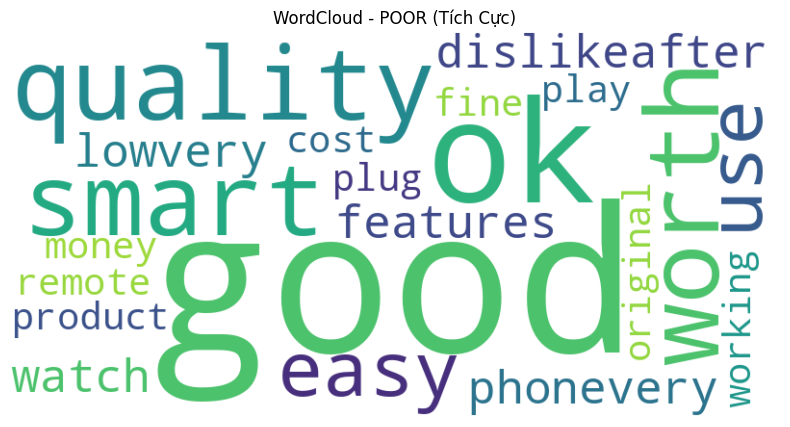

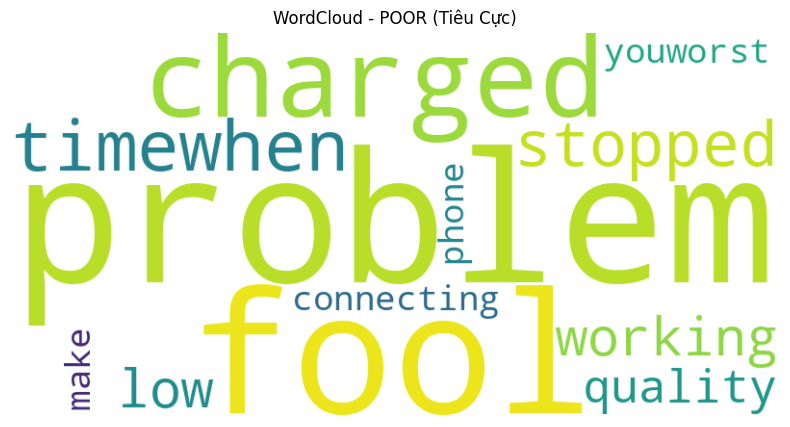

In [32]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import download

# Tải từ điển sentiment cho VADER
download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# === 1. Gán nhóm rating theo đề xuất ===
def categorize_rating(r):
    if r >= 4.5:
        return 'very_good'
    elif r >= 4.0:
        return 'good'
    elif r >= 3.5:
        return 'average'
    else:
        return 'poor'

df['rating_group'] = df['rating'].apply(categorize_rating)

# === 2. Làm sạch văn bản review ===
def clean_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['clean_review'] = df['review_content'].apply(clean_text)

# === 3. Phân tích cụm từ theo cảm xúc (VADER) ===
def show_sentiment_bigrams(group_name, top_n=20):
    texts = df[df['rating_group'] == group_name]['clean_review']
    if len(texts) == 0:
        print(f"\nKhông có dữ liệu cho nhóm: {group_name}")
        return

    # TF-IDF bigrams
    vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(2, 2), max_features=top_n * 4)
    X = vectorizer.fit_transform(texts)
    features = vectorizer.get_feature_names_out()
    scores = X.sum(axis=0).A1

    # Tính điểm cảm xúc cho từng bigram
    sentiment_scores = []
    for phrase, score in zip(features, scores):
        sentiment = sia.polarity_scores(phrase)['compound']  # từ -1 (tiêu cực) đến 1 (tích cực)
        sentiment_scores.append((phrase, score, sentiment))

    # Phân chia theo sentiment
    positive_phrases = [(p, s) for p, tfidf, s in sentiment_scores if s > 0.2]
    negative_phrases = [(p, s) for p, tfidf, s in sentiment_scores if s < -0.2]

    positive_phrases = sorted(positive_phrases, key=lambda x: x[1], reverse=True)[:top_n]
    negative_phrases = sorted(negative_phrases, key=lambda x: x[1], reverse=True)[:top_n]

    # In kết quả
    print(f"\n✅ Nhóm: {group_name.upper()} — Top {top_n} cụm từ TÍCH CỰC:")
    for phrase, score in positive_phrases:
        print(f"  {phrase:30s} ({score:.3f})")

    print(f"\n❌ Nhóm: {group_name.upper()} — Top {top_n} cụm từ TIÊU CỰC:")
    for phrase, score in negative_phrases:
        print(f"  {phrase:30s} ({score:.3f})")

    # WordCloud
    if positive_phrases:
        wordcloud = WordCloud(width=800, height=400, background_color='white')\
            .generate(" ".join(p for p, _ in positive_phrases))
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f"WordCloud - {group_name.upper()} (Tích Cực)")
        plt.axis("off")
        plt.show()

    if negative_phrases:
        wordcloud = WordCloud(width=800, height=400, background_color='white')\
            .generate(" ".join(p for p, _ in negative_phrases))
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f"WordCloud - {group_name.upper()} (Tiêu Cực)")
        plt.axis("off")
        plt.show()

# === 4. Phân tích từng nhóm rating ===
for group in ['very_good', 'good', 'average', 'poor']:
    show_sentiment_bigrams(group, top_n=20)

# 🎯 Kết luận rút ra

## 1. Những cụm từ tích cực xuất hiện phổ biến

Các cụm từ mang tính tích cực sau đây thường xuất hiện trong các nhóm đánh giá cao như `very_good`, `good` và một phần ở `average`:

- `good easy`
- `easy clean`
- `really good`
- `great product`
- `good product`
- `good quality`
- `easy use`

Đây đều là những cụm từ mô tả trải nghiệm sản phẩm tích cực, dễ sử dụng, chất lượng tốt.

Các cụm từ như `customer care`, `works perfectly`, `pretty good` cho thấy người dùng đánh giá cao cả chất lượng lẫn dịch vụ.

> ➡️ **Nhận xét:** Những cụm từ tích cực thường xoay quanh:
> - **Sự tiện dụng:** `easy use`, `easy clean`
> - **Chất lượng tốt:** `good quality`, `works perfectly`
> - **Trải nghiệm hài lòng chung:** `great product`, `really good`

---

## 2. Những cụm từ tiêu cực xuất hiện phổ biến

Trong khi các nhóm có đánh giá cao (`very_good`, `good`, `average`) hầu như rất ít cụm từ tiêu cực, nhóm `poor` lại thể hiện rõ một số cụm như:

- `stopped working`
- `low quality`
- `connecting problem`
- `problem phone`
- `make fool`
- `fool youworst`

Các cụm này cho thấy trải nghiệm sản phẩm bị lỗi, kết nối kém, hoặc cảm giác bị lừa khi mua hàng.

Cụm `stopped working` xuất hiện liên tục từ nhóm `good` trở xuống → là dấu hiệu tiêu cực phổ biến nhất.

> ➡️ **Nhận xét:** Những cụm từ tiêu cực phổ biến nhất thể hiện rõ vấn đề như:
> - **Hư hỏng sản phẩm:** `stopped working`, `low quality`
> - **Trục trặc kỹ thuật:** `connecting problem`
> - **Cảm giác tiêu cực mạnh:** `make fool`, `fool youworst`

---

## 3. Tổng hợp & Ý nghĩa

**Những từ khóa tích cực phổ biến nhất phản ánh:**
- Trải nghiệm sản phẩm tốt
- Dễ sử dụng
- Hài lòng với chất lượng và dịch vụ

**Những cụm từ tiêu cực phổ biến nhất phản ánh:**
- Trục trặc kỹ thuật
- Sản phẩm hư hỏng
- Cảm giác bị lừa

### 🧠 Insight thực tiễn

- **Cụm từ tiêu cực**, tuy ít, lại nổi bật ở nhóm đánh giá thấp → có thể dùng để **đào tạo mô hình phát hiện bất mãn**.
- **Cụm từ tích cực** có thể được dùng để **quảng bá sản phẩm** hoặc **gợi ý nội dung mô tả sản phẩm** phù hợp với kỳ vọng người dùng.

---

## 📌 Kết luận ngắn gọn

- **Cụm từ tích cực phổ biến:**  
  `good easy`, `easy clean`, `really good`, `great product`, `good product`

- **Cụm từ tiêu cực phổ biến:**  
  `stopped working`, `low quality`, `connecting problem`, `make fool`, `problem phone`

> ➡ Các cụm từ này phản ánh trực tiếp trải nghiệm của người dùng, cho phép doanh nghiệp:
> - **Cải thiện sản phẩm/dịch vụ** dựa trên cụm từ tiêu cực  
> - **Tận dụng cụm từ tích cực** cho truyền thông hoặc hỗ trợ khách hàng


### 5.3.2 Có mối liên hệ giữa độ dài review và điểm đánh giá không?

In [33]:
# tính độ dài review trung bình cho từng sản phẩm
all_avg_review_length = []
for i in range(1465):
    total_user_review = len(re.split(",", df.loc[i, 'user_id']))
    total_review_length = len(df.loc[i, 'review_content']) # tính độ dài review bằng tổng số kí tự 
    average_review_length = total_review_length / total_user_review
    all_avg_review_length.append(average_review_length)
print(all_avg_review_length[:10])

[60.375, 148.25, 33.875, 55.375, 306.375, 31.25, 74.25, 94.75, 498.625, 148.25]


🔍 Hệ số tương quan Pearson: 0.0605 (p-value = 0.0206)


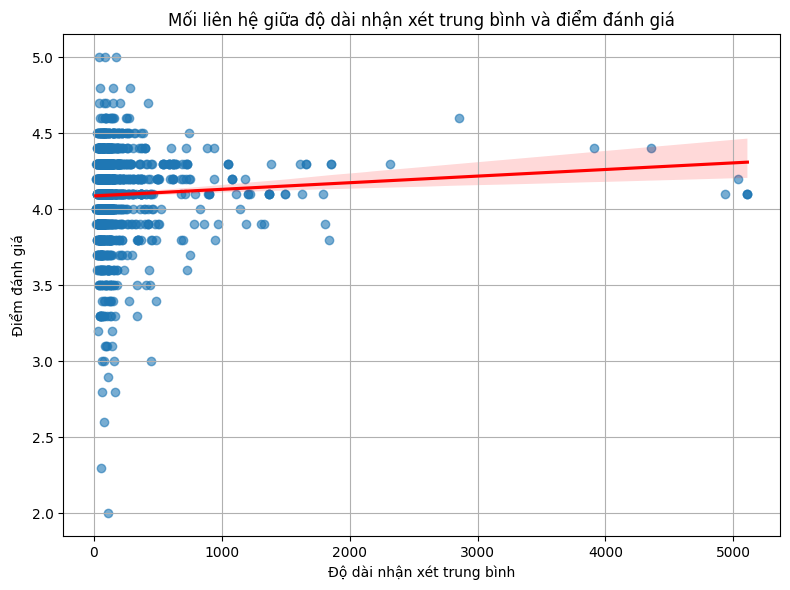

In [34]:
df_analysis = pd.DataFrame({
    "avg_review_length": all_avg_review_length,
    "rating": df["rating"] 
})

corr, p_value = pearsonr(df_analysis["avg_review_length"], df_analysis["rating"])
print(f"🔍 Hệ số tương quan Pearson: {corr:.4f} (p-value = {p_value:.4f})")

plt.figure(figsize=(8, 6))
sns.regplot(
    data=df_analysis,
    x="avg_review_length",
    y="rating",
    scatter_kws={"alpha": 0.6},
    line_kws={"color": "red"},
)
plt.title("Mối liên hệ giữa độ dài nhận xét trung bình và điểm đánh giá")
plt.xlabel("Độ dài nhận xét trung bình")
plt.ylabel("Điểm đánh giá")
plt.grid(True)
plt.tight_layout()
plt.show()


Hệ số tương quan Spearman: 0.1158 (p-value = 0.0000)


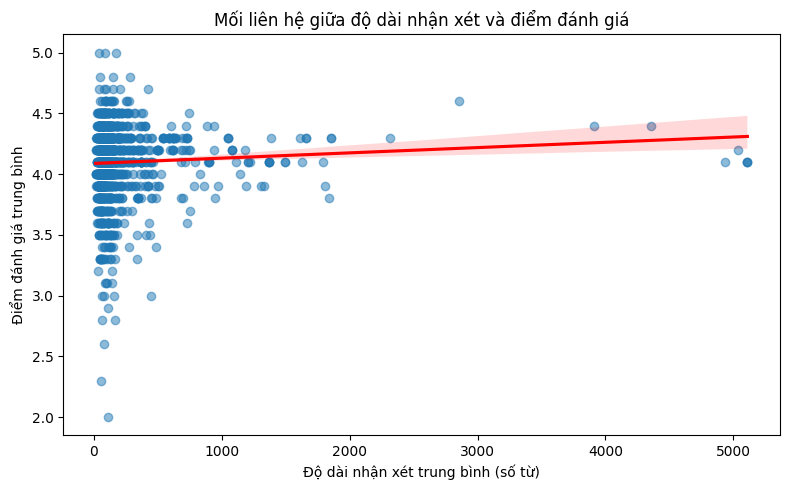

In [35]:
spearman_corr, spearman_p = spearmanr(df_analysis["avg_review_length"], df_analysis["rating"])

print(f"Hệ số tương quan Spearman: {spearman_corr:.4f} (p-value = {spearman_p:.4f})")

plt.figure(figsize=(8, 5))
sns.regplot(
    x="avg_review_length",
    y="rating",
    data=df_analysis,
    scatter_kws={"alpha": 0.5},
    line_kws={"color": "red"},
)

plt.title("Mối liên hệ giữa độ dài nhận xét và điểm đánh giá")
plt.xlabel("Độ dài nhận xét trung bình (số từ)")
plt.ylabel("Điểm đánh giá trung bình")
plt.tight_layout()
plt.show()

## 🎯 Kết luận rút ra

### 1. Có mối liên hệ cùng chiều yếu

- **Pearson = 0.0605**, **Spearman = 0.1158** → cả hai đều > 0 → cho thấy mối quan hệ **cùng chiều nhẹ** giữa độ dài nhận xét và điểm đánh giá.
- Trong đó, **Spearman có giá trị cao hơn Pearson** → gợi ý rằng **mối quan hệ phi tuyến (bất tuyến tính)** có thể tồn tại.
- Đường biểu diễn chếch nhẹ lên củng cố xu hướng tăng nhẹ.

➡️ **Nhận xét:** Khi **độ dài nhận xét trung bình của sản phẩm tăng**, **điểm đánh giá trung bình** cũng có xu hướng tăng — **nhưng mức độ ảnh hưởng là rất yếu**.

---

### 2. Ý nghĩa trong thực tế

- Người dùng hài lòng có thể có xu hướng viết nhận xét dài hơn để mô tả chi tiết trải nghiệm tích cực.
- Ngược lại, những người không hài lòng có thể chỉ để lại phản hồi ngắn gọn, thậm chí **không để lại nhận xét**.

- Tuy nhiên, **cả hai hệ số tương quan đều nhỏ** → mối quan hệ **không mạnh**.
- Các yếu tố khác như:
  - **Chất lượng sản phẩm**
  - **Mức độ nổi bật**
  - **Dịch vụ sau bán**
  - **Động lực cá nhân của người dùng**  
  → có thể **đóng vai trò quan trọng hơn** trong việc ảnh hưởng đến điểm đánh giá.

---

## 📌 Kết luận ngắn gọn

- Tồn tại một **mối quan hệ cùng chiều yếu** giữa **độ dài nhận xét** và **điểm đánh giá sản phẩm**.
- 👉 **Nhận xét dài hơn** thường đi kèm với **đánh giá cao hơn**, nhưng **mức độ ảnh hưởng là rất nhỏ**.
- ➡ Điều này cho thấy: **độ dài nhận xét không phải yếu tố then chốt**, và việc người dùng đánh giá cao hay thấp còn **phụ thuộc vào nhiều yếu tố khác** ngoài độ dài nội dung họ viết.


# ✅ Kết luận chung cho câu hỏi:
## **Phản hồi bằng văn bản của người dùng phản ánh như thế nào về mức độ hài lòng và điểm đánh giá của họ đối với sản phẩm?**

---

## 🧠 Giải thích tiềm năng

- Người dùng **hài lòng có xu hướng viết nhận xét dài hơn** để chia sẻ trải nghiệm chi tiết.
- Các **cụm từ tích cực** thể hiện rõ **kỳ vọng được đáp ứng**.
- Các **cụm từ tiêu cực** cho thấy **vấn đề nghiêm trọng** như hỏng hóc, cảm giác bị lừa.
- **Phản hồi văn bản** là **nguồn dữ liệu quan trọng** để hiểu rõ **bối cảnh và cảm xúc thực tế** đằng sau điểm số.

---

## 📌 Kết luận ngắn gọn

- **Phản hồi bằng văn bản cung cấp cái nhìn sâu sắc** về mức độ hài lòng của người dùng.
  - **Từ khóa** phản ánh rõ **cảm xúc tích cực hoặc tiêu cực**.
  - **Độ dài phản hồi** có **liên hệ yếu** với điểm đánh giá.

> ✅ Doanh nghiệp có thể tận dụng thông tin từ nhận xét để:
> - **Cải tiến sản phẩm**
> - **Phát hiện bất mãn**
> - **Định hướng truyền thông** phù hợp hơn với kỳ vọng khách hàng.
